# Pandas Workshop

In [85]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
% matplotlib inline

In [86]:
pd.__version__

'0.22.0'

## Pandas Series
Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.).

In [87]:
#Creating Pandas Series using lists

animals = ['Tiger', 'Bear', 'Lion']
pd.Series(animals)

0    Tiger
1     Bear
2     Lion
dtype: object

In [88]:
numbers = [1, 2, 3]
pd.Series(numbers)

0    1
1    2
2    3
dtype: int64

In [89]:
animals = ['Tiger', 'Bear', None]
pd.Series(animals)

0    Tiger
1     Bear
2     None
dtype: object

In [90]:
numbers = [1, 2, None]
pd.Series(numbers)

0    1.0
1    2.0
2    NaN
dtype: float64

In [91]:
#Index of a Series can be of String type

sportsDict = {'Archery': 'Bhutan',            
              'Golf': 'Scotland',
              'Sumo': 'Japan',
              'Hockey': 'India'}          #Creating Series from Dictionary

sports = pd.Series(sportsDict)
sports

Archery      Bhutan
Golf       Scotland
Hockey        India
Sumo          Japan
dtype: object

In [92]:
#Prints only indices and index type of a series

sports.index

Index(['Archery', 'Golf', 'Hockey', 'Sumo'], dtype='object')

In [93]:
#Another way of creating a series

nations = ['India', 'America', 'Sri Lanka']
nationalAnimals = pd.Series(animals, index = nations)
nationalAnimals

India        Tiger
America       Bear
Sri Lanka     None
dtype: object

## Querying a Series

In [94]:
sectionNames = ['A','B','C','D','E','F']

In [95]:
sectionStrength = [34,50,60,54,45,40]

In [96]:
sections = pd.Series(sectionStrength,index = sectionNames)

In [97]:
sections.head()

A    34
B    50
C    60
D    54
E    45
dtype: int64

In [98]:
sections.tail(3)

D    54
E    45
F    40
dtype: int64

In [99]:
#Querying a Series based on index location

sections.iloc[4]

45

In [100]:
#Querying a Series based on index label

sections.loc['B']

50

In [101]:
#This type of indexing uses the index labels by default to query Series if all index label are numeric ohterwise it uses
#index positons to query. For above series it will use index positons.

sections[3]     #Avoid this type of indexing since it can be misleading in case of numeric valued indices.

54

In [102]:
countryCodeDict ={91: 'India',
                   1: 'America',
                  20: 'Egypt',
                  33: 'France'}
countryCode = pd.Series(countryCodeDict)
countryCode

1     America
20      Egypt
33     France
91      India
dtype: object

In [103]:
 #using index labels
countryCode[20]         

'Egypt'

In [104]:
def invertSeries(s):
    '''
    objective:
        to ivert the role of indexes and values in a series
    input: 
        s: series
    output: 
        invertedSeries: inverted series s
    '''
    '''
        approach: 
            initialize an empty series invertedSeries 
            iterate through iteritems to append iverted entries from the series s to invertedSeries
    '''
    invertedSeries = pd.Series()
    for label, value in s.iteritems():        
        invertedSeries.at[value] = label
    return invertedSeries

In [105]:
invertedSeries = invertSeries(countryCode)
invertedSeries

America     1
Egypt      20
France     33
India      91
dtype: int64

## Operations on a Series 

In [106]:
#Adding values of a series  using for loop:

def getClassStrength(sections):
    '''
    objective: to compute the strength of the class across the sections
        
    input: 
        sections: series comprising sections of a class
    output: 
        classStrength: total number of students across the sections
    '''
    '''
    approach: 
        initialize classStrength = 0  
        iterate through iteritems 
    '''
    classStrength = 0
    for item in sections:
        classStrength += item
    return classStrength

In [107]:
getClassStrength(sections)

283

In [108]:
#Add series Elements using numpy function sum() - Using numpy functions is much faster than for loops

np.sum(sections)


283

In [109]:
#To see the performance difference between for loop and numpy sum() let us create a big series of random numbers

randomNos = pd.Series(np.random.randint(0,1000,10000))
randomNos.head()

0    277
1    777
2    509
3    648
4    865
dtype: int32

In [110]:
len(randomNos)

10000

In [111]:
%%timeit -n 100
total = 0
for item in randomNos:
    total += item

2.6 ms ± 159 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [112]:
%%timeit -n 100
total = np.sum(randomNos)

439 µs ± 40.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [113]:
#Iterating and Operating over every item of a series

def increaseStrength(sections, increment):
    '''
    objective:
        to increase strength of each section by increment
    inputs: 
        sections: input series
        increment: value by which saction strength is to be incremented 
    output:
        sections: each senction strength incremented by increment
    '''
    
    #approach: iterate through iteritems 
    
    for label, value in sections.iteritems():        
        sections.at[label] = value + increment
    return sections

In [114]:
sections = increaseStrength(sections, 5)
sections.head()

A    39
B    55
C    65
D    59
E    50
dtype: int64

In [115]:
#adds 5 to each value in Class using broadcasting - It is much faster

sections += 5 
sections


A    44
B    60
C    70
D    64
E    55
F    50
dtype: int64

In [116]:
#Appending a Series to another Series

nationalSports = pd.Series({ 'Archery': 'Bhutan',
                             'Golf': 'Scotland',
                             'Sumo': 'Japan',
                             'Taekwondo': 'South Korea'})
cricketLovingCountries = pd.Series(['Australia',
                                    'Barbados',
                                    'Pakistan',
                                    'England'], 
                                   index = ['Cricket',
                                            'Cricket',
                                            'Cricket',
                                            'Cricket'])
allCountries = nationalSports.append(cricketLovingCountries)

In [117]:
nationalSports

Archery           Bhutan
Golf            Scotland
Sumo               Japan
Taekwondo    South Korea
dtype: object

In [118]:
cricketLovingCountries

Cricket    Australia
Cricket     Barbados
Cricket     Pakistan
Cricket      England
dtype: object

In [119]:
allCountries

Archery           Bhutan
Golf            Scotland
Sumo               Japan
Taekwondo    South Korea
Cricket        Australia
Cricket         Barbados
Cricket         Pakistan
Cricket          England
dtype: object

In [120]:
allCountries.loc['Cricket']

Cricket    Australia
Cricket     Barbados
Cricket     Pakistan
Cricket      England
dtype: object

## Pandas Dataframe
DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. 

In [121]:
#Creating a Dataframe from multiple Series: Series indices are promoted to column headers 

import pandas as pd
purchase_1 = pd.Series({'Name': 'Ashish',
                        'Item Purchased': 'Bread',
                        'Cost': 22.50})
purchase_2 = pd.Series({'Name': 'Nikita',
                        'Item Purchased': 'Vegetables',
                        'Cost': 90.00})
purchase_3 = pd.Series({'Name': 'Vinod',
                        'Item Purchased': 'Milk',
                        'Cost': 75.00})
df = pd.DataFrame([purchase_1, purchase_2, purchase_3], index = [1, 2, 3])
purchase_1

Cost                22.5
Item Purchased     Bread
Name              Ashish
dtype: object

In [122]:
df.head()

,Cost,Item Purchased,Name
1,22.5,Bread,Ashish
2,90.0,Vegetables,Nikita
3,75.0,Milk,Vinod


In [123]:
#Selecting a Column from a Dataframe
Names = df['Name']              
print(Names)

1    Ashish
2    Nikita
3     Vinod
Name: Name, dtype: object


## Dataframe Operations

In [124]:
#Reading a CSV file into a Dataframe
shopping = pd.read_csv("Grocery.csv")         

In [125]:
shopping

,Product,Category,Price,Quantity
0,Bread,Food,20,2
1,Milk,Food,60,5
2,Biscuit,Food,20,2
3,Bourn-Vita,Food,70,1
4,Maggi,Food,20,5
5,Tea,Food,120,1
6,Soap,Hygiene,40,4
7,Brush,Hygiene,30,2
8,Detergent,Household,80,1
9,Hair-Oil,Hygiene,100,1


In [126]:
# Multiplying two Columns to get Total Price for an item
Total = shopping['Price']*shopping['Quantity']  
# Adding a new Column to the Dataframe
shopping['Total Price'] = Total                 

In [127]:
shopping['Total Price'] = shopping['Price']*shopping['Quantity']   

In [128]:
shopping

,Product,Category,Price,Quantity,Total Price
0,Bread,Food,20,2,40
1,Milk,Food,60,5,300
2,Biscuit,Food,20,2,40
3,Bourn-Vita,Food,70,1,70
4,Maggi,Food,20,5,100
5,Tea,Food,120,1,120
6,Soap,Hygiene,40,4,160
7,Brush,Hygiene,30,2,60
8,Detergent,Household,80,1,80
9,Hair-Oil,Hygiene,100,1,100


In [129]:
#Adding Values in Total Price Columm to get total expenditure
totalExpenditure = shopping['Total Price'].sum() 
totalExpenditure

3250

In [130]:
#Sorting Data in decreasing order of item price
shoppingSorted = shopping.sort_values('Price',ascending = False)    
shoppingSorted

,Product,Category,Price,Quantity,Total Price
14,T-Shirt,Clothes,250,3,750
16,Bucket,Household,200,1,200
10,Perfume,Hygiene,150,1,150
5,Tea,Food,120,1,120
18,Juice,Food,100,4,400
9,Hair-Oil,Hygiene,100,1,100
15,Bottle,Household,80,2,160
8,Detergent,Household,80,1,80
11,Tiffin Box,Household,75,2,150
3,Bourn-Vita,Food,70,1,70


In [131]:
shopping[['Price','Quantity','Total Price']].agg(['sum','mean','max','min','count','median','var'])    #Aggregation in Pandas

,Price,Quantity,Total Price
sum,1462.000000,77.000000,3250.000000
mean,73.100000,3.850000,162.500000
max,250.000000,15.000000,750.000000
min,2.000000,1.000000,20.000000
count,20.000000,20.000000,20.000000
median,65.000000,2.000000,135.000000
var,4430.621053,14.239474,27419.736842


In [132]:
shopping.describe()

,Price,Quantity,Total Price
count,20.00000,20.000000,20.00000
mean,73.10000,3.850000,162.50000
std,66.56291,3.773523,165.58906
min,2.00000,1.000000,20.00000
25%,20.00000,1.000000,67.50000
50%,65.00000,2.000000,135.00000
75%,100.00000,5.000000,160.00000
max,250.00000,15.000000,750.00000


In [133]:
shopping.quantile([0.25,0.5,0.75])

,Price,Quantity,Total Price
0.25,20.0,1.0,67.5
0.50,65.0,2.0,135.0
0.75,100.0,5.0,160.0


In [134]:
#Boolean Masking in Pandas
#Mask for products having price greater than 75 percentile of price
    
Mask = shopping['Price']>shopping['Price'].quantile(0.75)     

In [135]:
shopping[Mask]                          

,Product,Category,Price,Quantity,Total Price
5,Tea,Food,120,1,120
10,Perfume,Hygiene,150,1,150
14,T-Shirt,Clothes,250,3,750
16,Bucket,Household,200,1,200


In [136]:
#Groupby in Pandas
#All products grouped according to the category
Categories = shopping.groupby('Category')
#Total expenditure per category
Categories['Total Price'].sum()             

Category
Clothes        750
Food          1220
Household      590
Hygiene        620
Stationary      70
Name: Total Price, dtype: int64

In [137]:
#Total counts per category
Categories['Total Price'].count()                 

Category
Clothes       1
Food          8
Household     4
Hygiene       5
Stationary    2
Name: Total Price, dtype: int64

In [138]:
#Broadcasting in Pandas Dataframe
 #Increase the quantity of each product by 1
shopping['Quantity'] += 1          

In [139]:
shopping

,Product,Category,Price,Quantity,Total Price
0,Bread,Food,20,3,40
1,Milk,Food,60,6,300
2,Biscuit,Food,20,3,40
3,Bourn-Vita,Food,70,2,70
4,Maggi,Food,20,6,100
5,Tea,Food,120,2,120
6,Soap,Hygiene,40,5,160
7,Brush,Hygiene,30,3,60
8,Detergent,Household,80,2,80
9,Hair-Oil,Hygiene,100,2,100


In [140]:
#Pivoting : Reshapes the dataframe according to the given column,index and values

shoppingPivot = shopping.pivot(index = 'Category',columns = 'Product',values = 'Price')
shoppingPivot

Product,Biscuit,Bottle,Bourn-Vita,Bread,Brush,Bucket,Chips,Detergent,Hair-Oil,Juice,Maggi,Milk,Pen,Pencil,Perfume,Soap,T-Shirt,Tea,Tiffin Box,Tissues
Category,,,,,,,,,,,,,,,,,,,,
Clothes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250.0,NaN,NaN,NaN
Food,20.0,NaN,70.0,20.0,NaN,NaN,10.0,NaN,NaN,100.0,20.0,60.0,NaN,NaN,NaN,NaN,NaN,120.0,NaN,NaN
Household,NaN,80.0,NaN,NaN,NaN,200.0,NaN,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,NaN
Hygiene,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,150.0,40.0,NaN,NaN,NaN,30.0
Stationary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
#Filling NaN values with Not Applicable

shoppingPivot.fillna("NA",inplace=True)

In [142]:
shoppingPivot

Product,Biscuit,Bottle,Bourn-Vita,Bread,Brush,Bucket,Chips,Detergent,Hair-Oil,Juice,Maggi,Milk,Pen,Pencil,Perfume,Soap,T-Shirt,Tea,Tiffin Box,Tissues
Category,,,,,,,,,,,,,,,,,,,,
Clothes,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,250,NA,NA,NA
Food,20,NA,70,20,NA,NA,10,NA,NA,100,20,60,NA,NA,NA,NA,NA,120,NA,NA
Household,NA,80,NA,NA,NA,200,NA,80,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,75,NA
Hygiene,NA,NA,NA,NA,30,NA,NA,NA,100,NA,NA,NA,NA,NA,150,40,NA,NA,NA,30
Stationary,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,5,2,NA,NA,NA,NA,NA,NA


In [143]:
#deleting columns from a Dataframe

shoppingPivot.drop(['Bourn-Vita','Chips'],axis = 1)

Product,Biscuit,Bottle,Bread,Brush,Bucket,Detergent,Hair-Oil,Juice,Maggi,Milk,Pen,Pencil,Perfume,Soap,T-Shirt,Tea,Tiffin Box,Tissues
Category,,,,,,,,,,,,,,,,,,
Clothes,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,250,NA,NA,NA
Food,20,NA,20,NA,NA,NA,NA,100,20,60,NA,NA,NA,NA,NA,120,NA,NA
Household,NA,80,NA,NA,200,80,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,75,NA
Hygiene,NA,NA,NA,30,NA,NA,100,NA,NA,NA,NA,NA,150,40,NA,NA,NA,30
Stationary,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,5,2,NA,NA,NA,NA,NA,NA


In [144]:
#Combining data frames

shoppingNew = pd.read_csv('Grocery2.csv')
shoppingNew

,Product,Category,Price,Quantity
0,Jeans,Clothes,400,2
1,Chocolate,Food,50,4
2,Air Freshner,Household,80,2
3,Coffee,Food,120,1


In [145]:
shoppingFinal = pd.concat([shopping,shoppingNew]) 

In [146]:
shoppingFinal

,Category,Price,Product,Quantity,Total Price
0,Food,20,Bread,3,40.0
1,Food,60,Milk,6,300.0
2,Food,20,Biscuit,3,40.0
3,Food,70,Bourn-Vita,2,70.0
4,Food,20,Maggi,6,100.0
5,Food,120,Tea,2,120.0
6,Hygiene,40,Soap,5,160.0
7,Hygiene,30,Brush,3,60.0
8,Household,80,Detergent,2,80.0
9,Hygiene,100,Hair-Oil,2,100.0


In [147]:
#Resetting the row index

shoppingFinal = shoppingFinal.reset_index(drop = True)
shoppingFinal

,Category,Price,Product,Quantity,Total Price
0,Food,20,Bread,3,40.0
1,Food,60,Milk,6,300.0
2,Food,20,Biscuit,3,40.0
3,Food,70,Bourn-Vita,2,70.0
4,Food,20,Maggi,6,100.0
5,Food,120,Tea,2,120.0
6,Hygiene,40,Soap,5,160.0
7,Hygiene,30,Brush,3,60.0
8,Household,80,Detergent,2,80.0
9,Hygiene,100,Hair-Oil,2,100.0


In [148]:
#Altering the labels/Column headers

shoppingFinal = shoppingFinal.rename(columns = {'Product': 'Item'})
shoppingFinal

,Category,Price,Item,Quantity,Total Price
0,Food,20,Bread,3,40.0
1,Food,60,Milk,6,300.0
2,Food,20,Biscuit,3,40.0
3,Food,70,Bourn-Vita,2,70.0
4,Food,20,Maggi,6,100.0
5,Food,120,Tea,2,120.0
6,Hygiene,40,Soap,5,160.0
7,Hygiene,30,Brush,3,60.0
8,Household,80,Detergent,2,80.0
9,Hygiene,100,Hair-Oil,2,100.0


In [149]:
#Reindexing the columns 

shoppingFinal.reindex(columns = ['Item','Category','Price','Quantity','Total Price'])

,Item,Category,Price,Quantity,Total Price
0,Bread,Food,20,3,40.0
1,Milk,Food,60,6,300.0
2,Biscuit,Food,20,3,40.0
3,Bourn-Vita,Food,70,2,70.0
4,Maggi,Food,20,6,100.0
5,Tea,Food,120,2,120.0
6,Soap,Hygiene,40,5,160.0
7,Brush,Hygiene,30,3,60.0
8,Detergent,Household,80,2,80.0
9,Hair-Oil,Hygiene,100,2,100.0


## Data Plotting in Pandas

In [150]:
globalTemp = pd.read_csv('globalTemp.csv')

In [151]:
globalTemp.head()

,date,LandAverageTemperature
0,1750-01-01,3.034
1,1750-02-01,3.083
2,1750-03-01,5.626
3,1750-04-01,8.490
4,1750-05-01,11.573


Text(0,0.5,'Frequency')

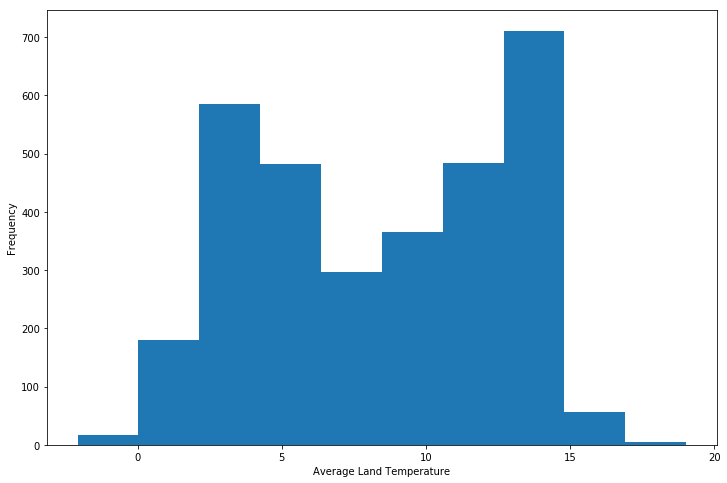

In [152]:
#Histogram

hist = globalTemp['LandAverageTemperature'].plot(kind = 'hist',figsize = (12, 8)) 
hist.set_xlabel("Average Land Temperature")
hist.set_ylabel("Frequency")

Text(0,0.5,'Temperature')

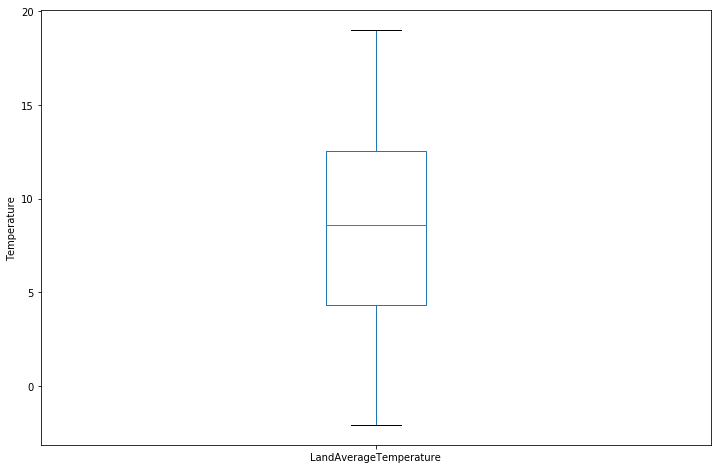

In [153]:
#Boxplot

box = globalTemp.plot(kind = 'box',figsize = (12, 8)) 
box.set_ylabel("Temperature")

In [154]:
populationData = pd.read_csv('Demographicdata.csv',index_col = 0)

In [155]:
populationData.head()

,Life expectancy,Population(in millions),Total Area(in miles)
Lithuania,72.1,3.28,65300
Latvia,72.2,2.23,64589
Bulgaria,73.5,7.35,110879
Romania,73.8,21.30,238391
Estonia,74.4,1.34,45228


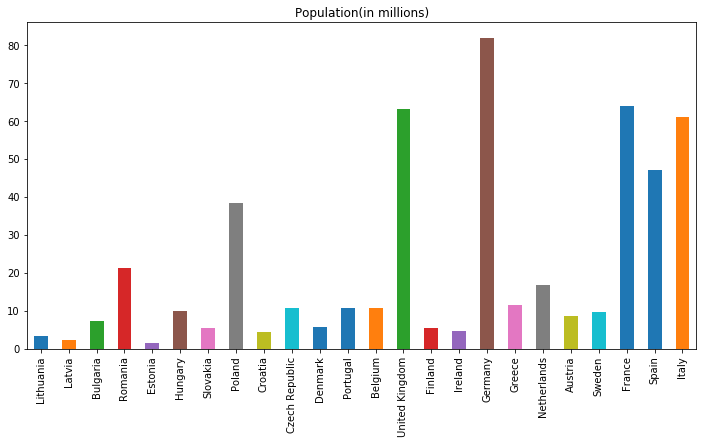

In [156]:
#Bar Graph

populationData['Population(in millions)'].plot(kind = 'bar', figsize = (12, 6), title = 'Population(in millions)')

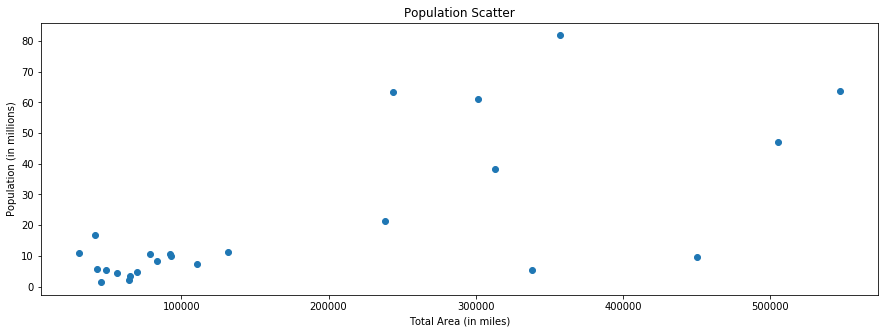

In [157]:
# Scatter plot

plt.figure(figsize = (15, 5))
plt.scatter(x = populationData['Total Area(in miles)'], y = populationData['Population(in millions)'])
plt.title("Population Scatter")
plt.xlabel("Total Area (in miles)")
plt.ylabel("Population (in millions)")
plt.show()

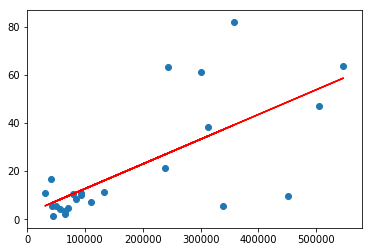

In [158]:
#Linear Regression plot

fig, axis = plt.subplots()
fit = np.polyfit(populationData['Total Area(in miles)'], populationData['Population(in millions)'], deg = 1)
axis.plot(populationData['Total Area(in miles)'], fit[0] * populationData['Total Area(in miles)']+ fit[1], color = 'red')
axis.scatter(populationData['Total Area(in miles)'], populationData['Population(in millions)'])

## Handling Missing Values

In [159]:
#Handling Missing Values

globalTemp.head()

,date,LandAverageTemperature
0,1750-01-01,3.034
1,1750-02-01,3.083
2,1750-03-01,5.626
3,1750-04-01,8.490
4,1750-05-01,11.573


In [160]:
#Displaying rows with missing values

globalTemp[np.isnan(globalTemp['LandAverageTemperature'])]

,date,LandAverageTemperature
10,1750-11-01,NaN
16,1751-05-01,NaN
18,1751-07-01,NaN
21,1751-10-01,NaN
22,1751-11-01,NaN
23,1751-12-01,NaN
25,1752-02-01,NaN
28,1752-05-01,NaN
29,1752-06-01,NaN
30,1752-07-01,NaN


In [161]:
#Filling Missing values with the mean values of the column

globalTemp['LandAverageTemperature'] = globalTemp['LandAverageTemperature'].fillna(globalTemp['LandAverageTemperature'].mean())

In [162]:
#Now there are no Mising Values

globalTemp[np.isnan(globalTemp['LandAverageTemperature'])]

,date,LandAverageTemperature


In [163]:
#Nan Values filled with mean of column

globalTemp.iloc[10]

date                      1750-11-01
LandAverageTemperature       8.37473
Name: 10, dtype: object

In [164]:
globalTemp.iloc[31]

date                      1752-08-01
LandAverageTemperature       8.37473
Name: 31, dtype: object